In [85]:
#!/usr/bin/env python
# coding: utf-8

import cv2 #resize image
import numpy as np
import os #for directories
from random import shuffle
from tqdm import tqdm #progress bar

TRAIN_DIR = './Data/Kaggle/train'
IMG_SIZE = 50
LR = 1e-3

def label_img(img):
    word_label = img.split('.')[0]
    if word_label == 'cat': return [1,0]
    elif word_label == 'dog': return [0,1]

training_data = []
def create_train_data():
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy',training_data)
    return training_data

# train_data = create_train_data()

import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Conv2D,Activation,MaxPooling2D,Dense,Flatten,Dropout
from keras import optimizers

#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# sgd = optimizers.SGD(lr=LR, decay=1e-6, momentum=0.9, nesterov=True)
Adam = optimizers.Adam(learning_rate=LR)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

train_data = np.load('train_data.npy')

train = train_data[:-400]
test = train_data[-400:]

X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # the image data in train
Y = np.array([i[1] for i in train])

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = np.array([i[1] for i in test])

# print(train_data)

In [79]:
#train the model
deepBrain = model.fit(X, Y, validation_data=(test_x, test_y), epochs=11, use_multiprocessing=True, verbose=1, shuffle=True)

model.save("deepBrain.h5")

Train on 23000 samples, validate on 2000 samples
Epoch 1/11
23000/23000 [==============================] - 36s 2ms/step - loss: 0.5856 - accuracy: 0.6941 - val_loss: 0.5667 - val_accuracy: 0.7100
Epoch 2/11
23000/23000 [==============================] - 47s 2ms/step - loss: 0.5527 - accuracy: 0.7221 - val_loss: 0.5782 - val_accuracy: 0.7210
Epoch 3/11
23000/23000 [==============================] - 51s 2ms/step - loss: 0.5258 - accuracy: 0.7403 - val_loss: 0.5187 - val_accuracy: 0.7570
Epoch 4/11
23000/23000 [==============================] - 52s 2ms/step - loss: 0.4931 - accuracy: 0.7618 - val_loss: 0.5122 - val_accuracy: 0.7520
Epoch 5/11
23000/23000 [==============================] - 49s 2ms/step - loss: 0.4767 - accuracy: 0.7710 - val_loss: 0.5086 - val_accuracy: 0.7530
Epoch 6/11
23000/23000 [==============================] - 48s 2ms/step - loss: 0.4486 - accuracy: 0.7914 - val_loss: 0.4938 - val_accuracy: 0.7695
Epoch 7/11
23000/23000 [==============================] - 51s 2ms/ste

In [94]:
img = cv2.resize(cv2.imread('./Predicted Images/cat2.jpg', cv2.IMREAD_GRAYSCALE),(IMG_SIZE, IMG_SIZE))
img = img.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = model.predict(img)
print(np.round(y, 3))

[[1. 0.]]


In [109]:
deepBrain.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

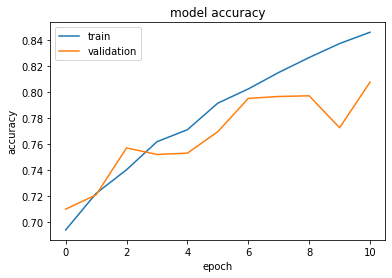

<Figure size 1008x360 with 0 Axes>

In [112]:
plt.plot(deepBrain.history['accuracy'])
plt.plot(deepBrain.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.figure(figsize=(14, 5))
plt.show()

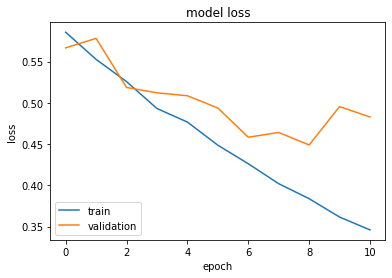

In [117]:
plt.plot(deepBrain.history['loss'])
plt.plot(deepBrain.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower left')
plt.show()